In [20]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

import re
import random
from os import listdir

In [2]:
"""
TODO 0: Find out the image shape as a tuple and include it in your report.
"""
IMG_SHAPE = cv2.cvtColor(cv2.imread('ps8a-dataset/imagenet_val1000_downsampled/00001.png'),cv2.COLOR_BGR2GRAY).shape
print(f'Image Shape = {IMG_SHAPE}')


Image Shape = (64, 64)


In [3]:
def load_data(data_dir, top_n=10):
    """
    Load the data and return a list of images and their labels.

    :param data_dir: The directory where the data is located
    :param top_n: The number of people with the most images to use

    Suggested return values, feel free to change as you see fit
    :return data_top_n: A list of images of only people with top n number of images
    :return target_top_n: Corresponding labels of the images
    :return target_names: A list of all labels(names)
    :return target_count: A dictionary of the number of images per person
    """
    # read and randomize list of file names
    print("Load Face Data -------------------------------------")
    file_list = [fname for fname in listdir(data_dir) if fname.endswith('.pgm')]
    print(f'    Size of file list = {len(file_list)}')
    random.shuffle(file_list)
    name_list = [re.sub(r'_\d{4}.pgm', '', name).replace('_', ' ') for name in file_list]
    print(f'    Size of name list = {len(name_list)}')
    # get a list of all labels
    target_names = sorted(list(set(name_list)))
    unsorted_name_list = np.array(list(name_list)).reshape((-1,1))
    print(f'    Size of unsorted name list = {unsorted_name_list.shape}')
    # print(unsorted_name_list)
    # get labels for each image
    target = np.array([target_names.index(name) for name in name_list])

    # read in all images
    data = np.array([cv2.imread(data_dir + fname, 0) for fname in file_list])
    print(f'    Size of data list = {len(data)}')
    print(f'    Size of target list = {len(target)}')
    """
    TODO 1: Only preserve images of 10 people with the highest occurence, then plot 
            a histogram of the number of images per person in the preserved dataset.
            Include the histogram in your report.
    """
    unique, counts = np.unique(target, return_counts=True)
    target_count = dict(zip(unique, counts))
    
    # YOUR CODE HERE
    # target_count is a dictionary of the number of images per person
    # where the key is an index to label ('target'), and the value is the number of images
    # Try to use sorted() to sort the dictionary by value, then only keep the first 10 items of the output list.
    target_count = dict(sorted(target_count.items(), key=lambda item: item[1], reverse=True))
    print(f'    Size of target_count list = {len(target_count)}')
    target_top_n = list(target_count.keys())[0:top_n]
    
    # data_top_n is a list of labels of only people with top n number of images
    names_top_n = [target_names[id] for id in target_top_n]
    target_top_n = []
    index_list = []
    for i in  range(unsorted_name_list.shape[0]):
        # print(i)
        if (unsorted_name_list[i,0] in names_top_n):
            index_list.append(i)
            target_top_n.append(target_names.index(unsorted_name_list[i,0]))
    target_top_n = np.array(target_top_n)
    # index_list = [item for sublist in index_list for item in sublist]
    print(f'    Size of Index list = {len(index_list)}')
    # print(index_list)
    data_top_n = data[index_list][:][:]
    data_top_n = np.array([row.flatten() for row in data_top_n])
    print(f'    Size of target_top_n list = {target_top_n.shape}')
    print(f'    Size of data_top_n list = {data_top_n.shape}')
    # You can plot the histogram using plt.bar()
    # autofmt_xdate() is also useful for rotating the x-axis labels
    # Plot histogram
    fig, ax = plt.subplots()
    ax.bar(names_top_n, list(target_count.values())[0:top_n])
    fig.autofmt_xdate()
    plt.show()
    # plt.autofmt_xdate()

    return data_top_n, target_top_n, target_names, target_count



In [4]:
def load_data_nonface(data_dir):
    """
    Your can write your functin comments here.
    """
    
    """
    TODO 2: Load the nonface data and return a list of images.
    """
    print("Load Non-Face Data -------------------------------------")
    # YOUR CODE HERE
    # Take a look at the load_data() function for reference
    file_list = [fname for fname in listdir(data_dir) if fname.endswith('.png')]
    print(f'    Size of file list = {len(file_list)}')
    random.shuffle(file_list)

    data = np.array([cv2.imread(data_dir + fname, 0) for fname in file_list])
    print(f'    Size of data list = {len(data)}')
    return data


In [5]:
def perform_pca(data_train, data_test, data_noneface, n_components, plot_PCA=False):
    """
    Your can write your functin comments here.
    """

    """
    TODO 3: Perform PCA on the training data, then transform the training, testing, 
            and nonface data. Return the transformed data. This includes:
            a) Flatten the images if you haven't done so already
            b) Standardize the data (0 mean, unit variance)
            c) Perform PCA on the standardized training data
            d) Transform the standardized training, testing, and nonface data
            e) Plot the transformed training and nonface data using the first three
               principal components if plot_PCA is True. Include the plots in your report.
            f) Return the principal components and transformed training, testing, and nonface data
    """
    # YOUR CODE HERE
    # You can use the StandardScaler() function to standardize the data
    scaler = StandardScaler()

    data_train_centered = np.array([row.flatten() for row in data_train])
    data_train_centered = scaler.fit_transform(data_train_centered)
    # print(f'Data Train Shape : {data_train_centered.shape}')

    data_test_centered = np.array([row.flatten() for row in data_test])
    data_test_centered = scaler.transform(data_test_centered)
    # print(f'Data Test Shape : {data_test_centered.shape}')

    data_noneface_centered = np.array([row.flatten() for row in data_noneface])
    data_noneface_centered = scaler.transform(data_noneface_centered)
    # print(f'Data none face Shape : {data_noneface_centered.shape}')

    # You can use the decomposition.PCA() and function to perform PCA
    # You can check the example code in the documentation using the links below
    # https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

    pca = decomposition.PCA(n_components = n_components)

    # You can use the pca.transform() function to transform the data
    data_train_pca = pca.fit_transform(data_train_centered)
    # print(f'Trained Data after PCA = {data_train_pca.shape}')
    data_test_pca = pca.transform(data_test_centered)
    data_noneface_pca = pca.transform(data_noneface_centered)

    # You can use the scatter3D() function to plot the transformed data
    # Please not that 3 principal components may not be enough to separate the data
    # So your plot of face and nonface data may not be clearly separated
    if plot_PCA:
        fig = plt.figure(figsize = (10, 7))
        ax = plt.axes(projection ="3d")
        # Creating plot
        ax.scatter3D(data_train_pca[:,0], data_train_pca[:,1], data_train_pca[:,2], color = "green")
        plt.title("Train Data PCA")
    return pca, data_train_pca, data_test_pca, data_noneface_pca

In [6]:
def plot_eigenfaces(pca):
    """
    TODO 4: Plot the first 8 eigenfaces. Include the plot in your report.
    """
    n_row = 2
    n_col = 4
    eigenfaces = pca.components_[0:8]
    fig, axes = plt.subplots(n_row, n_col, figsize=(12, 6))
    ctr = 0
    for i in range(n_row):
        # YOUR CODE HERE
        # The eigenfaces are the principal components of the training data
        # Since we have flattened the images, you can use reshape() to reshape to the original image shape
        for j in range(n_col):
            axes[i][j].imshow(eigenfaces[ctr].reshape(IMG_SHAPE), cmap="gray")
            ctr = ctr + 1
    plt.show()


In [23]:
def train_classifier(data_train_pca, target_train):
    """
    TODO 5: OPTIONAL: Train a classifier on the training data.
            SVM is recommended, but feel free to use any classifier you want.
            Also try using the RandomizedSearchCV to find the best hyperparameters.
            Include the classifier you used as well as the parameters in your report.
            Feel free to look up sklearn documentation and examples on usage of classifiers.
    """
    # YOUR CODE HERE
    # You can read the documents from sklearn to learn about the classifiers provided by sklearn
    # https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
    # If you are using SVM, you can also check the example below
    # https://scikit-learn.org/stable/modules/svm.html
    # Also, you can use the RandomizedSearchCV to find the best hyperparameters
    # clf = SVC(kernel='rbf',gamma = 'scale')
    clf = MLPClassifier(alpha=1, max_iter=1000)
    # clf = RandomForestClassifier(max_depth=3, random_state=0)
    # clf = GaussianNB()
    clf = clf.fit(data_train_pca, target_train)
    return clf


Load Face Data -------------------------------------
    Size of file list = 13233
    Size of name list = 13233
    Size of unsorted name list = (13233, 1)
    Size of data list = 13233
    Size of target list = 13233
    Size of target_count list = 5749
    Size of Index list = 1456
    Size of target_top_n list = (1456,)
    Size of data_top_n list = (1456, 4096)


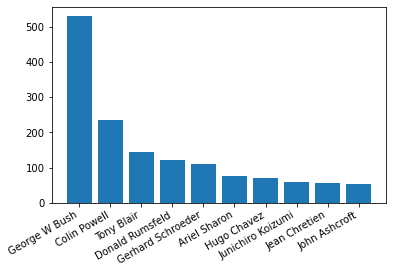

Load Non-Face Data -------------------------------------
    Size of file list = 1000
    Size of data list = 1000
Total dataset size: 1456
Training dataset size: 1092
Test dataset size: 364
Nonface dataset size: 1000


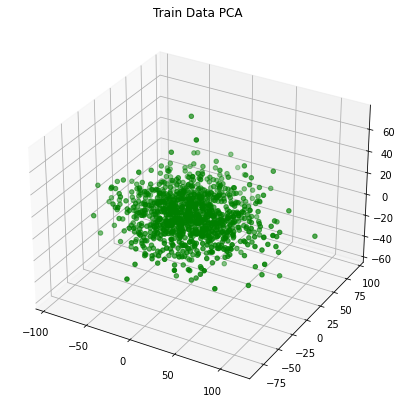

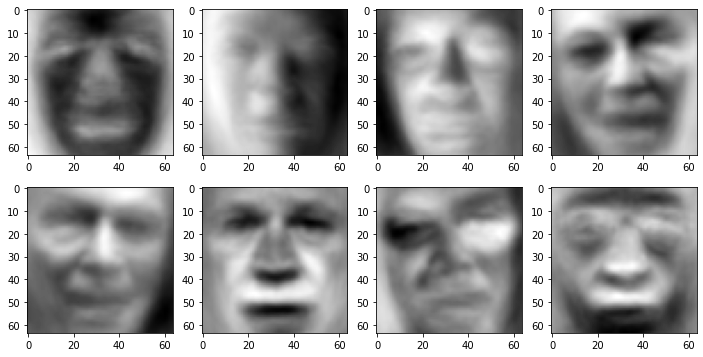

Start Part 2 of the problem ---------------------------
Classifier created
Accuracy:  0.35714285714285715


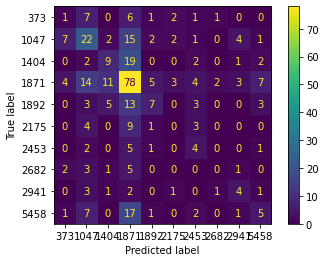

Number of components = 3, Accuracy = 0.3434065934065934
Number of components = 5, Accuracy = 0.31868131868131866
Number of components = 10, Accuracy = 0.47527472527472525
Number of components = 20, Accuracy = 0.6401098901098901
Number of components = 40, Accuracy = 0.75
Number of components = 60, Accuracy = 0.771978021978022
Number of components = 80, Accuracy = 0.7637362637362637
Number of components = 100, Accuracy = 0.7774725274725275
Number of components = 120, Accuracy = 0.7802197802197802
Number of components = 130, Accuracy = 0.7912087912087912


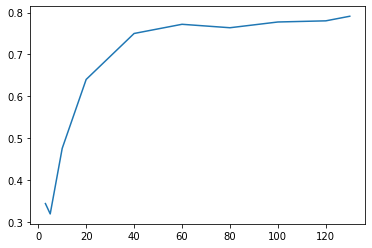

Resuls of Analysis


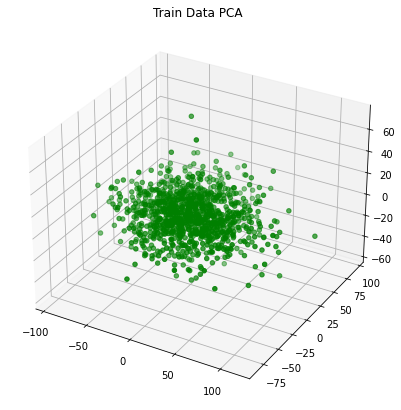

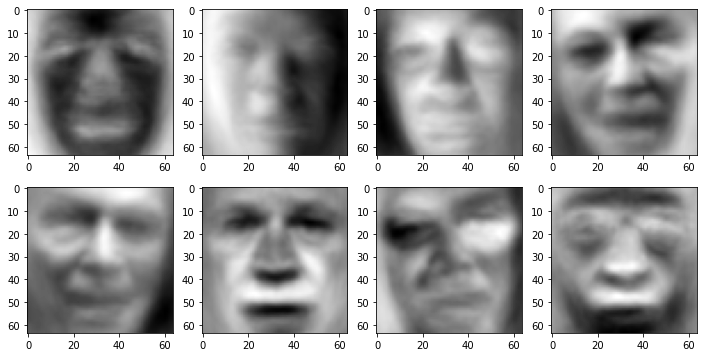

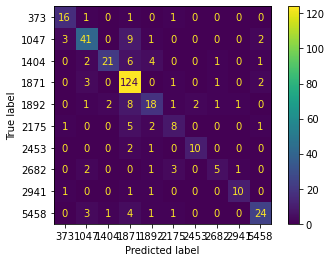

In [26]:
if __name__ == '__main__':
    """
    Load the data
    Face Dataset from https://conradsanderson.id.au/lfwcrop/
    Modified from original dataset http://vis-www.cs.umass.edu/lfw/
    Noneface Dataset modified from http://image-net.org/download-images
    All modified datasets are available in the Box folder
    """
    data, target, target_names, target_count = load_data('ps8a-dataset/lfw_crop/', top_n=10)
    data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.25, random_state=42)
    data_noneface = load_data_nonface('ps8a-dataset/imagenet_val1000_downsampled/')
    print("Total dataset size:", data.shape[0])
    print("Training dataset size:", data_train.shape[0])
    print("Test dataset size:", data_test.shape[0])
    print("Nonface dataset size:", data_noneface.shape[0])

    # Perform PCA, you can change the number of components as you wish
    pca, data_train_pca, data_test_pca, data_noneface_pca = perform_pca(
        data_train, data_test, data_noneface, n_components=8, plot_PCA=True
    )

    # Plot the first 8 eigenfaces. To do this, make sure n_components is at least 8
    plot_eigenfaces(pca)

    """
    Start of PS 8-2
    This part is optional. You will get extra credits if you complete this part.
    """
    print('Start Part 2 of the problem ---------------------------')
    # Train a classifier on the transformed training data
    classifier = train_classifier(data_train_pca, target_train)
    print('Classifier created')
    # Evaluate the classifier
    pred = classifier.predict(data_test_pca)
    # Use a simple percentage of correct predictions as the metric
    accuracy = np.count_nonzero(np.where(pred == target_test)) / pred.shape[0]
    print("Accuracy: ", accuracy)
    """
    TODO 6: OPTIONAL: Plot the confusion matrix of the classifier.
            Include the plot and accuracy in your report.
            You can use the sklearn.metrics.ConfusionMatrixDisplay function.
    """ 
    # YOUR CODE HERE
    cm = confusion_matrix(target_test, pred, labels=classifier.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    disp.plot()
    plt.show()
    """
    TODO 7: OPTIONAL: Plot the accuracy with different number of principal components.
            This might take a while to run. Feel free to decrease training iterations if
            you want to speed up the process. We won't set a hard threshold on the accuracy.
            Include the plot in your report.
    """
    n_components_list = [3, 5, 10, 20, 40, 60, 80, 100, 120, 130]
    accuracy_list = []
    # YOUR CODE HERE
    for n_component in n_components_list:
        pca, data_train_pca, data_test_pca, data_noneface_pca = perform_pca(
        data_train, data_test, data_noneface, n_components=n_component, plot_PCA=False)
        classifier = train_classifier(data_train_pca, target_train)
        pred = classifier.predict(data_test_pca)
        accuracy_list.append(np.count_nonzero(np.where(pred == target_test)) / pred.shape[0])
        print(f'Number of components = {n_component}, Accuracy = {accuracy_list[-1]}')
    plt.plot(n_components_list,accuracy_list)
    plt.show()
    print('Resuls of Analysis')
    pca, data_train_pca, data_test_pca, data_noneface_pca = perform_pca(
        data_train, data_test, data_noneface, n_components=120, plot_PCA=True)
    plot_eigenfaces(pca)
    classifier = train_classifier(data_train_pca, target_train)
    pred = classifier.predict(data_test_pca)
    cm = confusion_matrix(target_test, pred, labels=classifier.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    disp.plot()
    plt.show()